# Leads Case Study
X eductaion institue sells online course to the industries based on their campain and the interestes received from multiple customers,But currently their Conversion rate is around 30% and the CEO of the company would like to make it as 80%.

As a Data scientist we would need to build a Logistic regression model and assign a lead score between 0 and 100,Which can be used by the company to target the potential leads so that they can reach the Target

## Step 1: Reading and Understanding the Data

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# visulaisation
from matplotlib.pyplot import xticks
%matplotlib inline

#### Importing the Data from the source File

In [2]:
Leads_data = pd.read_csv("Leads.csv")
Leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


Most of the variables in this table have space between them so would like to remove the space and replace them with _ for all the variables

In [3]:
Leads_data.columns =Leads_data.columns.str.replace(' ', '_')

### Data Inspection

In [4]:
Leads_data.shape

(9240, 37)

In [5]:
Leads_data.describe()

,Lead_Number,Converted,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,Asymmetrique_Activity_Score,Asymmetrique_Profile_Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
Leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect_ID                                      9240 non-null object
Lead_Number                                      9240 non-null int64
Lead_Origin                                      9240 non-null object
Lead_Source                                      9204 non-null object
Do_Not_Email                                     9240 non-null object
Do_Not_Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total_Time_Spent_on_Website                      9240 non-null int64
Page_Views_Per_Visit                             9103 non-null float64
Last_Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [7]:
Leads_data.isnull().sum().sort_values(ascending=False)

Lead_Quality                                     4767
Asymmetrique_Profile_Score                       4218
Asymmetrique_Activity_Score                      4218
Asymmetrique_Profile_Index                       4218
Asymmetrique_Activity_Index                      4218
Tags                                             3353
What_matters_most_to_you_in_choosing_a_course    2709
Lead_Profile                                     2709
What_is_your_current_occupation                  2690
Country                                          2461
How_did_you_hear_about_X_Education               2207
Specialization                                   1438
City                                             1420
TotalVisits                                       137
Page_Views_Per_Visit                              137
Last_Activity                                     103
Lead_Source                                        36
Do_Not_Email                                        0
Do_Not_Call                 

###### Observation on Data Inspection:-
- This data is talking about 37 features of 9240 customers
- Most of the variables are object type 
- Many variables are holding the null values

### Data Cleaning
##### Treating the Variables with 'select' as values
There are many features with select as their values , this might be due to the customers has not provided any value from the drop down provided, Lets start with treating that one

#### Converting select to Nan

In [8]:
col_list=list(Leads_data.columns.values)
x= [i for i in col_list if Leads_data[i].astype(str).str.contains('Select').sum() > 0 ]
print(x)

['Specialization', 'How_did_you_hear_about_X_Education', 'Lead_Profile', 'City']


In [9]:
for i in x:
    Leads_data[i]=Leads_data[i].replace(r'Select', np.nan, regex=True)

In [10]:
Leads_data.head()

,Prospect_ID,Lead_Number,Lead_Origin,Lead_Source,Do_Not_Email,Do_Not_Call,Converted,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,...,Get_updates_on_DM_Content,Lead_Profile,City,Asymmetrique_Activity_Index,Asymmetrique_Profile_Index,Asymmetrique_Activity_Score,Asymmetrique_Profile_Score,I_agree_to_pay_the_amount_through_cheque,A_free_copy_of_Mastering_The_Interview,Last_Notable_Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [11]:
round(100*(Leads_data.isnull().sum()/len(Leads_data.index)), 2).sort_values(ascending=False)

How_did_you_hear_about_X_Education               78.46
Lead_Profile                                     74.19
Lead_Quality                                     51.59
Asymmetrique_Profile_Score                       45.65
Asymmetrique_Activity_Score                      45.65
Asymmetrique_Profile_Index                       45.65
Asymmetrique_Activity_Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What_matters_most_to_you_in_choosing_a_course    29.32
What_is_your_current_occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page_Views_Per_Visit                              1.48
Last_Activity                                     1.11
Lead_Source                                       0.39
Lead_Origin                                       0.00
Lead_Numbe

#### Drop the Values with high percentage of missing Values
As per the Above Lets try wit the Values more than 35 % of Null values

In [12]:
Leads_data=Leads_data.replace({'':np.nan})
Leads_data = Leads_data.dropna(thresh=0.65*len(Leads_data), axis=1)

In [13]:
Leads_data.shape

(9240, 27)

###### Treating Null Values:-
    - After dropping the features with more null value percentage we can see that there are 27 variables left in the data set.
    - What_matters_most_to_you_in_choosing_a_course has the most Null values in the revised data set

##### What_matters_most_to_you_in_choosing_a_course:

In [14]:
Leads_data.What_matters_most_to_you_in_choosing_a_course.describe()

count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: What_matters_most_to_you_in_choosing_a_course, dtype: object

In [15]:
Leads_data.groupby('What_matters_most_to_you_in_choosing_a_course').What_matters_most_to_you_in_choosing_a_course.count().sort_values(ascending=False)

What_matters_most_to_you_in_choosing_a_course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What_matters_most_to_you_in_choosing_a_course, dtype: int64

Most of the values in this Variable is holding the value as 'Better Career Prospects' hance we can use this value to impute the data

In [16]:
Leads_data['What_matters_most_to_you_in_choosing_a_course'].fillna('Better Career Prospects', inplace=True)

In [17]:
round(100*(Leads_data.isnull().sum()/len(Leads_data.index)), 2).sort_values(ascending=False)

What_is_your_current_occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page_Views_Per_Visit                              1.48
Last_Activity                                     1.11
Lead_Source                                       0.39
Last_Notable_Activity                             0.00
Lead_Number                                       0.00
Lead_Origin                                       0.00
Do_Not_Email                                      0.00
Do_Not_Call                                       0.00
Converted                                         0.00
Total_Time_Spent_on_Website                       0.00
What_matters_most_to_you_in_choosing_a_course     0.00
A_free_copy_of_Mastering_The_Interview            0.00
Search                                            0.00
Magazine                                          0.00
Newspaper_Article                                 0.00
X_Educatio

##### What_is_your_current_occupation:

In [18]:
Leads_data['What_is_your_current_occupation'].describe()

count           6550
unique             6
top       Unemployed
freq            5600
Name: What_is_your_current_occupation, dtype: object

In [19]:
Leads_data.groupby('What_is_your_current_occupation').What_is_your_current_occupation.count().sort_values(ascending=False)

What_is_your_current_occupation
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What_is_your_current_occupation, dtype: int64

Based on our understanding we can use Unemployed to replace the Null values for this variable as most of the customers in this dataset are unemployed.

In [20]:
Leads_data['What_is_your_current_occupation'].fillna('Unemployed', inplace=True)

In [21]:
round(100*(Leads_data.isnull().sum()/len(Leads_data.index)), 2).sort_values(ascending=False)

Country                                          26.63
TotalVisits                                       1.48
Page_Views_Per_Visit                              1.48
Last_Activity                                     1.11
Lead_Source                                       0.39
Last_Notable_Activity                             0.00
What_is_your_current_occupation                   0.00
Lead_Number                                       0.00
Lead_Origin                                       0.00
Do_Not_Email                                      0.00
Do_Not_Call                                       0.00
Converted                                         0.00
Total_Time_Spent_on_Website                       0.00
What_matters_most_to_you_in_choosing_a_course     0.00
A_free_copy_of_Mastering_The_Interview            0.00
Search                                            0.00
Magazine                                          0.00
Newspaper_Article                                 0.00
X_Educatio

##### Country

In [22]:
Leads_data['Country'].describe()

count      6779
unique       38
top       India
freq       6492
Name: Country, dtype: object

In [23]:
Leads_data.groupby('Country').Country.count().sort_values(ascending=False)

Country
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Kuwait                     4
Sweden                     3
Belgium                    2
Bangladesh                 2
China                      2
Ghana                      2
Asia/Pacific Region        2
Italy                      2
Netherlands                2
Philippines                2
Uganda                     2
Indonesia                  1
Kenya                      1
Liberia                    1
Vietnam                    1
Denmark                    1
Russia                     1
Sri La

Country is India for most values so let's impute the same in missing values.

In [24]:
Leads_data['Country'].fillna('India', inplace=True)

In [25]:
round(100*(Leads_data.isnull().sum()/len(Leads_data.index)), 2).sort_values(ascending=False)

TotalVisits                                      1.48
Page_Views_Per_Visit                             1.48
Last_Activity                                    1.11
Lead_Source                                      0.39
Last_Notable_Activity                            0.00
What_is_your_current_occupation                  0.00
Lead_Number                                      0.00
Lead_Origin                                      0.00
Do_Not_Email                                     0.00
Do_Not_Call                                      0.00
Converted                                        0.00
Total_Time_Spent_on_Website                      0.00
Country                                          0.00
What_matters_most_to_you_in_choosing_a_course    0.00
A_free_copy_of_Mastering_The_Interview           0.00
Search                                           0.00
Magazine                                         0.00
Newspaper_Article                                0.00
X_Education_Forums          

In [26]:
#### Rest missing values are under 2% so we can drop these rows.
Leads_data.dropna(inplace = True)

In [27]:
Leads_data.shape

(9074, 27)

In [28]:
round(100*(Leads_data.isnull().sum()/len(Leads_data.index)), 2).sort_values(ascending=False)

Last_Notable_Activity                            0.0
What_is_your_current_occupation                  0.0
Lead_Number                                      0.0
Lead_Origin                                      0.0
Lead_Source                                      0.0
Do_Not_Email                                     0.0
Do_Not_Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total_Time_Spent_on_Website                      0.0
Page_Views_Per_Visit                             0.0
Last_Activity                                    0.0
Country                                          0.0
What_matters_most_to_you_in_choosing_a_course    0.0
A_free_copy_of_Mastering_The_Interview           0.0
Search                                           0.0
Magazine                                         0.0
Newspaper_Article                                0.0
X_Education_Forums                            

After the data preparation step we end up with 27 fields in the data set lets visualize the data by performing Uni variate Bi and Multi variate analysis

## Step 2: Visualizing the Data
Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multi col-linearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

Here the Target variable for this data set is Converted, Lets visualize the data for each variable and understand the same.

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

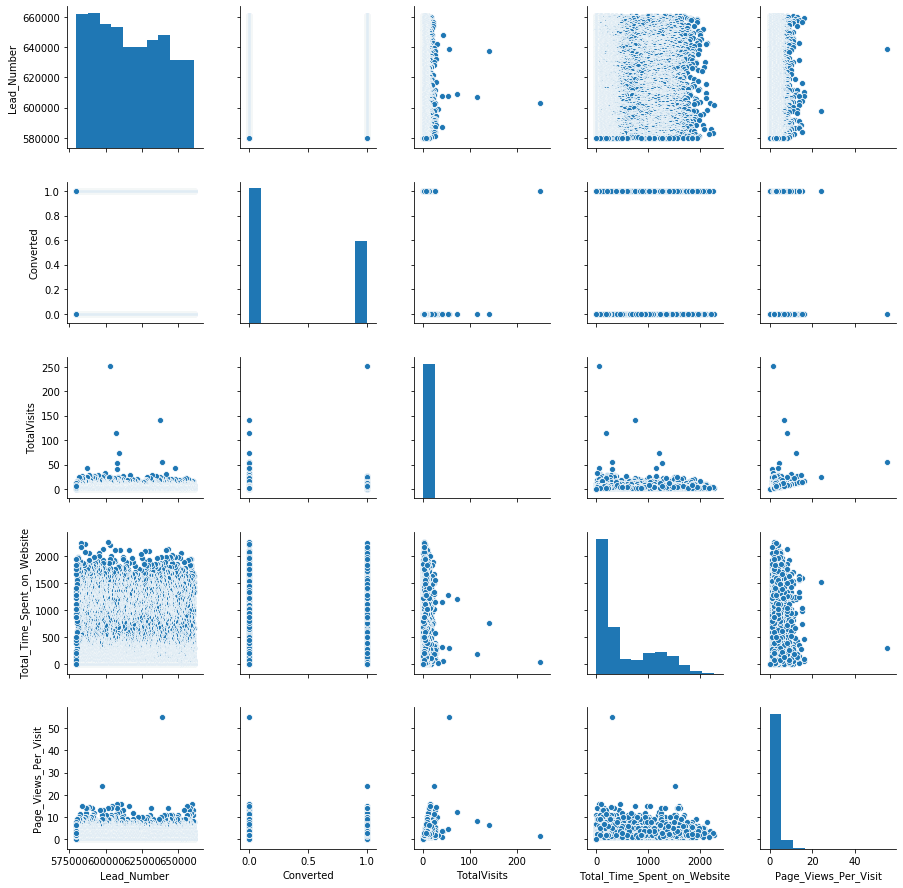

In [30]:
sns.pairplot(Leads_data)
plt.show()

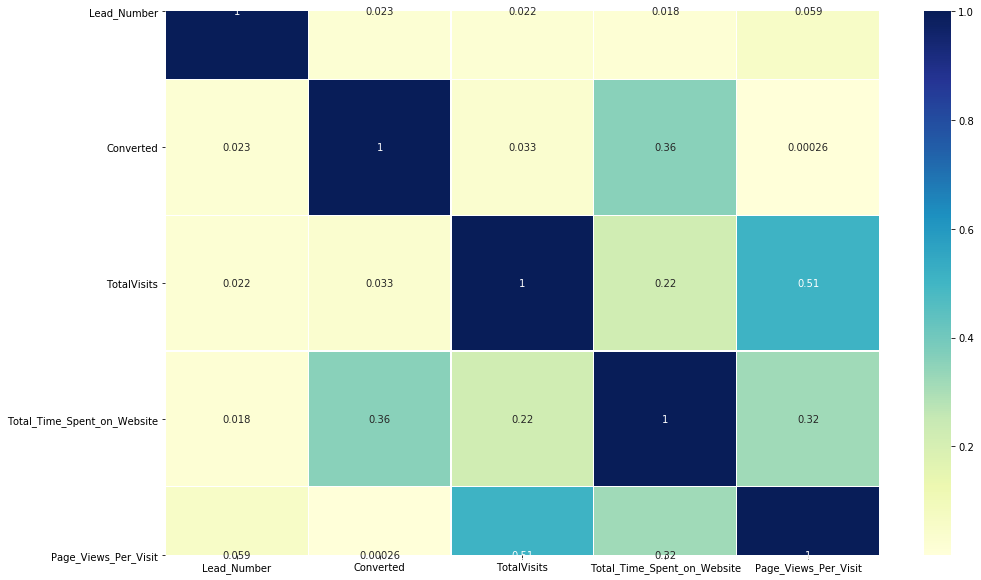

In [31]:
plt.figure(figsize = (16, 10))
sns.heatmap(Leads_data.corr(), cmap="YlGnBu", annot = True,linecolor = 'white',linewidths=0.1)
plt.show()

###### Observations:-
   We Observed that the Converted variable is the Target table where as we don't have to bother about Lead_number and the continuous and categorical value classification can be happened as below for our Data set:

   **Continuous Variables:-**
   - Lead_Number(Primary Key)
   - Converted(Target Value)
   - TotalVisits
   - Total_Time_Spent_on_Website
   - Page_Views_Per_Visit
   -Prospect_Id
  
  We don't need to worry about Lead_number and Converted while implementation of our model
        
   **Categorical Variables:-**
   - Lead Origin
   - Lead Source
   - Do Not Email
   - Do Not Call
   - Converted
   - Last Activity
   - Country
   - What is your current occupation
   - What matters most to you in choosing this course
   - Search
   - Magazine
   - Newspaper Article
   - X Education Forums
   - Newspaper
   - Digital Advertisement
   - Through Recommendations
   - Receive More Updates About Our Courses
   - Lead Quality
   - Update me on Supply Chain Content
   - Get updates on DM Content
   - I agree to pay the amount through cheque
   - a free copy of Mastering The Interview
   - Last Notable Activity

Box Plot can be drawn with all the categorical Variables against Converted Variable

As per the current data We have the Converted percentage as 37% lets check the same

In [32]:
Converted = (sum(Leads_data['Converted'])/len(Leads_data['Converted'].index))*100
Converted

37.85541106458012

###### Lead Source vs Converted Variable

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

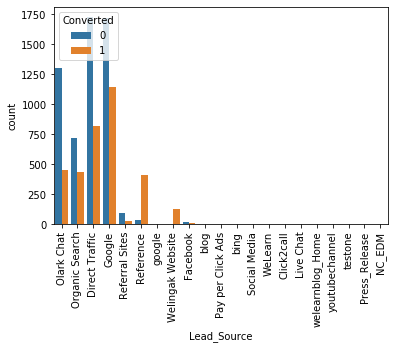

In [33]:

sns.countplot(x = "Lead_Source", hue = "Converted", data = Leads_data)
xticks(rotation = 90)


We can Observe that there are same Values are repeated due to case sensitivity in this data,Eg Google and google, Referral sites and Reference can be same and the Lead_source like 'Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release', 'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel' can be binned togater as since theya re having very less count This can be converted as Other_Source

In [34]:
Leads_data['Lead_Source'] = Leads_data['Lead_Source'].replace(['google'], 'Google')
Leads_data['Lead_Source'] = Leads_data['Lead_Source'].replace(['Referral Sites'], 'Reference')
Leads_data['Lead_Source'] = Leads_data['Lead_Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others_Sources')

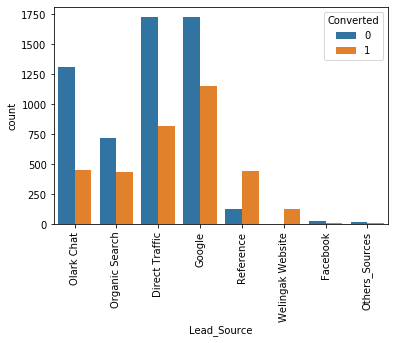

In [35]:
#Lead Source vs Converted Variable
sns.countplot(x = "Lead_Source", hue = "Converted", data = Leads_data)
xticks(rotation = 90)
plt.show()

Except reference almost all the Lead sources has the less Conversion rate so focus should be Increased in converting the Lead_sources for Google,Olarck Chat Etc..

###### Last_Activity vs Converted

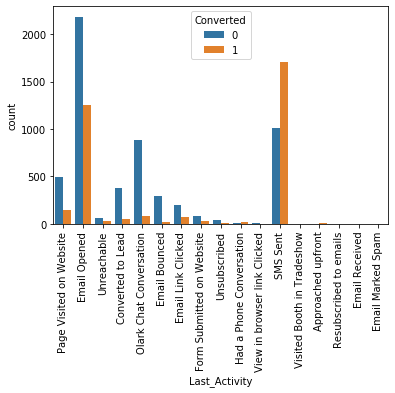

In [36]:
sns.countplot(x = "Last_Activity", hue = "Converted", data = Leads_data)
xticks(rotation = 90)
plt.show()

The Values of Last_Activity like Had a phone conversation,View in browser link Clicked,Visited Booth in Tradeshow ,Approached upfront,Resubscribed to emails,Email Received and Email Marked Spam does have very less count so they can be converted as single value like Other_Activity

In [37]:
Leads_data['Last_Activity'] = Leads_data['Last_Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked','Visited Booth in Tradeshow', 'Approached upfront','Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Others_Activity')

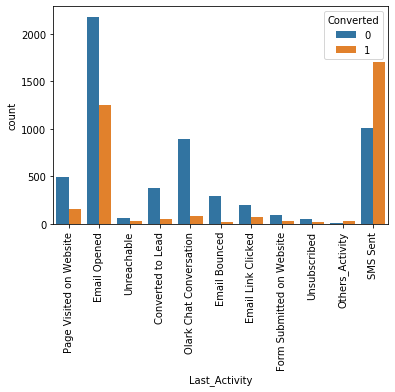

In [38]:
sns.countplot(x = "Last_Activity", hue = "Converted", data = Leads_data)
xticks(rotation = 90)
plt.show()

We can Observe that most of the customers  have Opened the email and responded back with the SMS but  Olark Chat Conversation can be better

###### Do_Not_Email,Do_Not_Call vs Converted

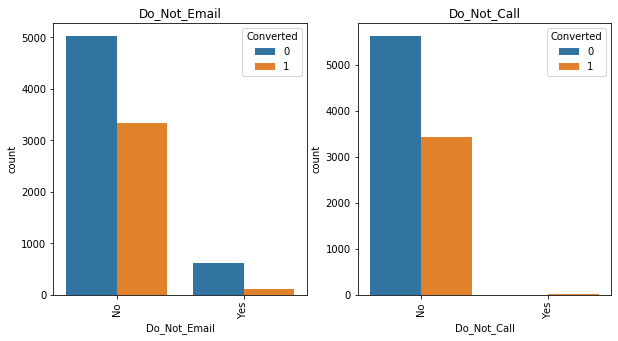

In [39]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Do_Not_Email', hue='Converted', data= Leads_data).tick_params(axis='x', rotation = 90)
plt.title('Do_Not_Email')

plt.subplot(1,2,2)
sns.countplot(x='Do_Not_Call', hue='Converted', data= Leads_data).tick_params(axis='x', rotation = 90)
plt.title('Do_Not_Call')
plt.show()

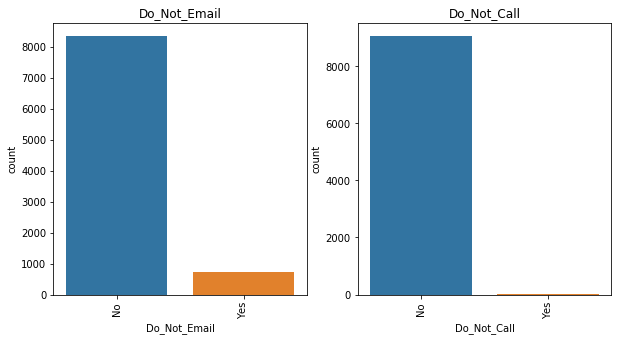

In [40]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Do_Not_Email', data= Leads_data).tick_params(axis='x', rotation = 90)
plt.title('Do_Not_Email')

plt.subplot(1,2,2)
sns.countplot(x='Do_Not_Call', data= Leads_data).tick_params(axis='x', rotation = 90)
plt.title('Do_Not_Call')
plt.show()

We can drop both the variables since there is a lot of skewness for them

###### What is your current occupation Vs Converted:-

Lets understand the nature of people willing to be Converted based on the Occupation

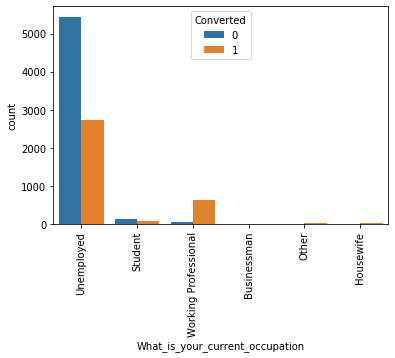

In [41]:
sns.countplot(x = "What_is_your_current_occupation", hue = "Converted", data = Leads_data)
xticks(rotation = 90)
plt.show()

In [42]:
Leads_data['What_is_your_current_occupation'] = Leads_data['What_is_your_current_occupation'].replace(['Businessman', 'Other', 'Housewife'], 'Other')

Observations:-
- Businesman, Others and Housewifes are least interested in converting where as Unemployed associated and Working Professionals are most likely to get converted
- There are more people from unemployed category are not willing to get converted that shoudl be the most focused area for this for better results

In [43]:
Leads_data[['What_matters_most_to_you_in_choosing_a_course','Search','Magazine','Newspaper_Article','X_Education_Forums','Newspaper','Digital_Advertisement','Through_Recommendations','Receive_More_Updates_About_Our_Courses']].describe()

,What_matters_most_to_you_in_choosing_a_course,Search,Magazine,Newspaper_Article,X_Education_Forums,Newspaper,Digital_Advertisement,Through_Recommendations,Receive_More_Updates_About_Our_Courses
count,9074,9074,9074,9074,9074,9074,9074,9074,9074
unique,3,2,1,2,2,2,2,2,1
top,Better Career Prospects,No,No,No,No,No,No,No,No
freq,9072,9060,9074,9072,9073,9073,9070,9067,9074


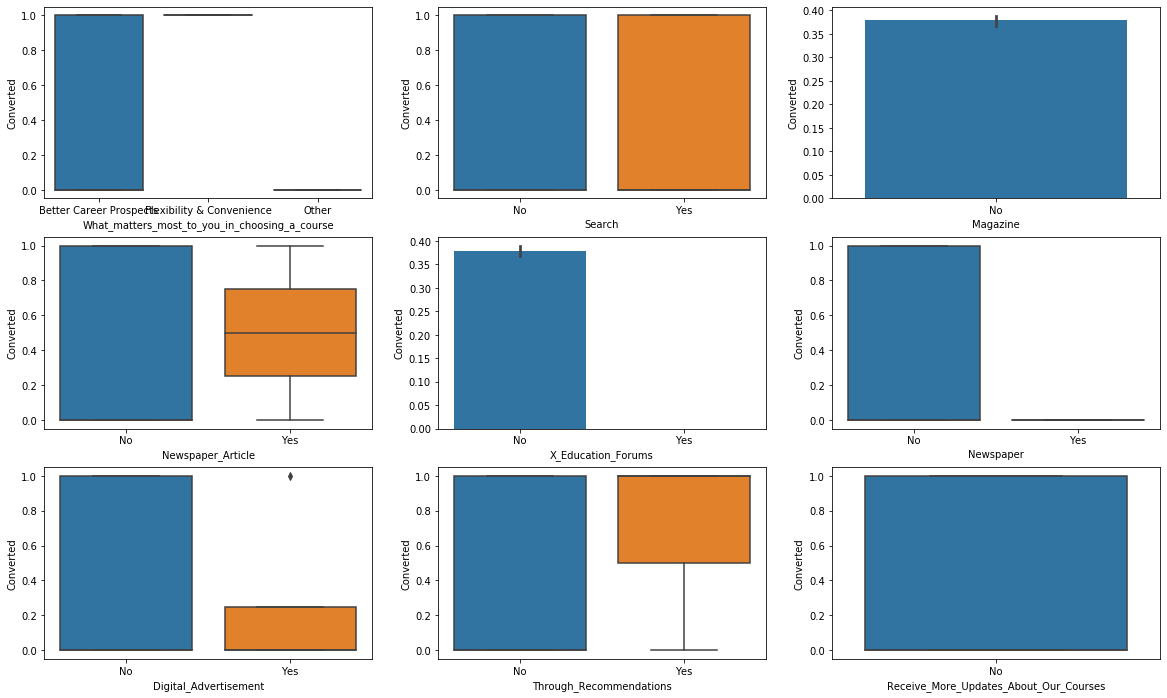

In [44]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'What_matters_most_to_you_in_choosing_a_course', y = 'Converted', data = Leads_data)
plt.subplot(3,3,2)
sns.boxplot(x = 'Search', y = 'Converted', data = Leads_data)
plt.subplot(3,3,3)
sns.barplot(x = 'Magazine', y = 'Converted', data = Leads_data)
plt.subplot(3,3,4)
sns.boxplot(x = 'Newspaper_Article', y = 'Converted', data = Leads_data)
plt.subplot(3,3,5)
sns.barplot(x = 'X_Education_Forums', y = 'Converted', data = Leads_data)
plt.subplot(3,3,6)
sns.boxplot(x = 'Newspaper', y = 'Converted', data = Leads_data)
plt.subplot(3,3,7)
sns.boxplot(x = 'Digital_Advertisement', y = 'Converted', data = Leads_data)
plt.subplot(3,3,8)
sns.boxplot(x = 'Through_Recommendations', y = 'Converted', data = Leads_data)
plt.subplot(3,3,9)
sns.boxplot(x = 'Receive_More_Updates_About_Our_Courses', y = 'Converted', data = Leads_data)
plt.show()

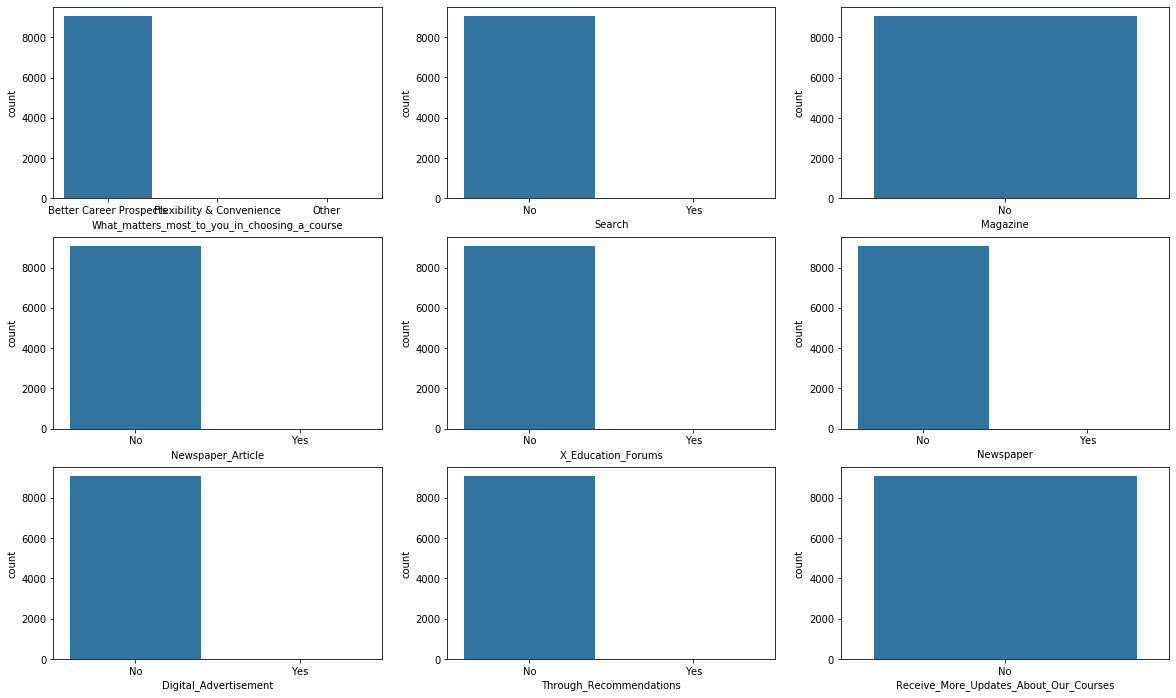

In [45]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.countplot(x = 'What_matters_most_to_you_in_choosing_a_course', data = Leads_data)
plt.subplot(3,3,2)
sns.countplot(x = 'Search', data = Leads_data)
plt.subplot(3,3,3)
sns.countplot(x = 'Magazine', data = Leads_data)
plt.subplot(3,3,4)
sns.countplot(x = 'Newspaper_Article', data = Leads_data)
plt.subplot(3,3,5)
sns.countplot(x = 'X_Education_Forums', data = Leads_data)
plt.subplot(3,3,6)
sns.countplot(x = 'Newspaper', data = Leads_data)
plt.subplot(3,3,7)
sns.countplot(x = 'Digital_Advertisement', data = Leads_data)
plt.subplot(3,3,8)
sns.countplot(x = 'Through_Recommendations', data = Leads_data)
plt.subplot(3,3,9)
sns.countplot(x = 'Receive_More_Updates_About_Our_Courses', data = Leads_data)
plt.show()

All these fields mentioned above doesn't make Any inferences due to the below reasons
- What_matters_most_to_you_in_choosing_a_course : Most of the values in this variable is Better Career Prospects 9072 out of 9074 is having the same value
- Search: Most of the values for this variable has 'No' as the value 9060 out of 9074 have the same value
- Magazine: All the Values for this variable is having the values as No
- News_Article: 9072 out of 9074 holds the value as No
- X_Education_Forums:-9073 out of 9074 holds the value as No
- Newspaper: 9073 out of 9074 holds the value as No
- Digital_Advertisement: 9070 out of 9074 holds the value as No
- Through_Recommendations:9067 out of 9074 holds the value as No
- Receive_More_Updates_About_Our_Courses: 100% of the customers have opted as No 



###### 'Update_me_on_Supply_Chain_Content','Get_updates_on_DM_Content','I_agree_to_pay_the_amount_through_cheque','A_free_copy_of_Mastering_The_Interview' vs Converted:

In [46]:
Leads_data[['Update_me_on_Supply_Chain_Content','Get_updates_on_DM_Content','I_agree_to_pay_the_amount_through_cheque','A_free_copy_of_Mastering_The_Interview']].describe()

,Update_me_on_Supply_Chain_Content,Get_updates_on_DM_Content,I_agree_to_pay_the_amount_through_cheque,A_free_copy_of_Mastering_The_Interview
count,9074,9074,9074,9074
unique,1,1,1,2
top,No,No,No,No
freq,9074,9074,9074,6186


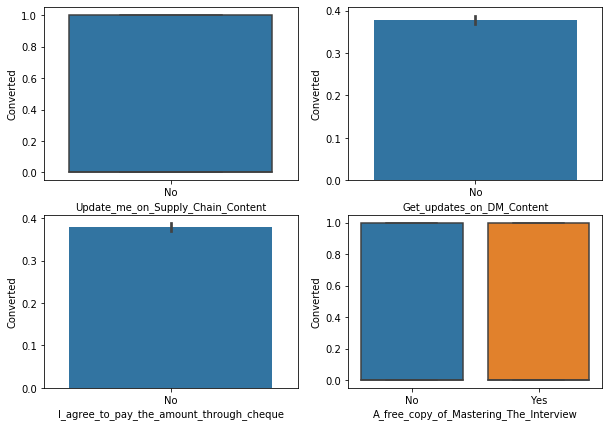

In [47]:
plt.figure(figsize=(10, 7))
plt.subplot(2,2,1)
sns.boxplot(x = 'Update_me_on_Supply_Chain_Content', y = 'Converted', data = Leads_data)
plt.subplot(2,2,2)
sns.barplot(x = 'Get_updates_on_DM_Content', y = 'Converted', data = Leads_data)
plt.subplot(2,2,3)
sns.barplot(x = 'I_agree_to_pay_the_amount_through_cheque', y = 'Converted', data = Leads_data)
plt.subplot(2,2,4)
sns.boxplot(x = 'A_free_copy_of_Mastering_The_Interview', y = 'Converted', data = Leads_data)
plt.show()

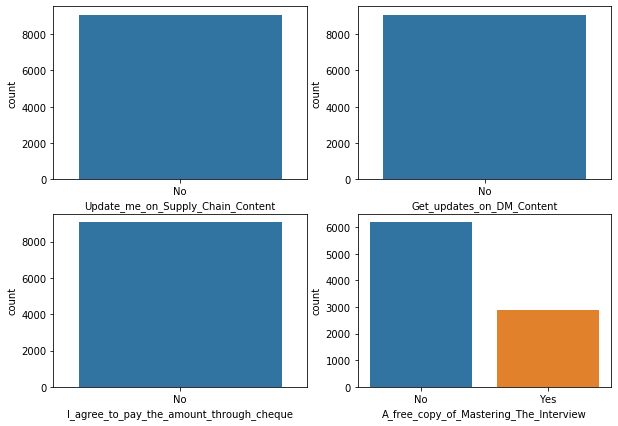

In [48]:
plt.figure(figsize=(10, 7))
plt.subplot(2,2,1)
sns.countplot(x = 'Update_me_on_Supply_Chain_Content', data = Leads_data)
plt.subplot(2,2,2)
sns.countplot(x = 'Get_updates_on_DM_Content', data = Leads_data)
plt.subplot(2,2,3)
sns.countplot(x = 'I_agree_to_pay_the_amount_through_cheque', data = Leads_data)
plt.subplot(2,2,4)
sns.countplot(x = 'A_free_copy_of_Mastering_The_Interview', data = Leads_data)
plt.show()

###### Observations:
- The variables like 'Update_me_on_Supply_Chain_Content','Get_updates_on_DM_Content','I_agree_to_pay_the_amount_through_cheque','A_free_copy_of_Mastering_The_Interview' doesn't hold any inferences as thea re holding the same values for almost the entire data set


EDA is completed for all the Variables hence Out of our inference we can delete all the Variables that doesn't make any inferences since they doesn't hold much value to our model 

In [49]:
Leads_data = Leads_data.drop(['Prospect_ID','Lead_Number','What_matters_most_to_you_in_choosing_a_course','Search','Magazine','Newspaper_Article','X_Education_Forums','Newspaper','Digital_Advertisement','Through_Recommendations','Receive_More_Updates_About_Our_Courses','Update_me_on_Supply_Chain_Content','Get_updates_on_DM_Content','I_agree_to_pay_the_amount_through_cheque','Country','Do_Not_Email','Do_Not_Call'],1)

In [50]:
Leads_data.shape

(9074, 10)

We are left with 10 features by the end of our EDA process

In [51]:
# let's look at the statistical aspects of the dataframe
Leads_data.describe()

,Converted,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit
count,9074.000000,9074.000000,9074.000000,9074.000000
mean,0.378554,3.456028,482.887481,2.370151
std,0.485053,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,11.000000,1.000000
50%,0.000000,3.000000,246.000000,2.000000
75%,1.000000,5.000000,922.750000,3.200000
max,1.000000,251.000000,2272.000000,55.000000


In [52]:
Leads_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 10 columns):
Lead_Origin                               9074 non-null object
Lead_Source                               9074 non-null object
Converted                                 9074 non-null int64
TotalVisits                               9074 non-null float64
Total_Time_Spent_on_Website               9074 non-null int64
Page_Views_Per_Visit                      9074 non-null float64
Last_Activity                             9074 non-null object
What_is_your_current_occupation           9074 non-null object
A_free_copy_of_Mastering_The_Interview    9074 non-null object
Last_Notable_Activity                     9074 non-null object
dtypes: float64(2), int64(2), object(6)
memory usage: 1.1+ MB


## Step 3: Data Preparation

##### Converting some binary variables (Yes/No) to 1/0

In [53]:
# List of variables to map

varlist =  ['A_free_copy_of_Mastering_The_Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
Leads_data[varlist] = Leads_data[varlist].apply(binary_map)

In [54]:
Leads_data.head()

,Lead_Origin,Lead_Source,Converted,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,Last_Activity,What_is_your_current_occupation,A_free_copy_of_Mastering_The_Interview,Last_Notable_Activity
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Unemployed,0,Modified
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Unemployed,0,Email Opened
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Student,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Unemployed,0,Modified
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Unemployed,0,Modified


#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [55]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(Leads_data[['Lead_Origin','Lead_Source','Last_Activity','What_is_your_current_occupation','Last_Notable_Activity']], drop_first=True)

# Adding the results to the master dataframe
Leads_data = pd.concat([Leads_data, dummy1], axis=1)

In [56]:
Leads_data.head()

,Lead_Origin,Lead_Source,Converted,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,Last_Activity,What_is_your_current_occupation,A_free_copy_of_Mastering_The_Interview,Last_Notable_Activity,...,Last_Notable_Activity_Form Submitted on Website,Last_Notable_Activity_Had a Phone Conversation,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_Resubscribed to emails,Last_Notable_Activity_SMS Sent,Last_Notable_Activity_Unreachable,Last_Notable_Activity_Unsubscribed,Last_Notable_Activity_View in browser link Clicked
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Unemployed,0,Modified,...,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Unemployed,0,Email Opened,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Student,1,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Unemployed,0,Modified,...,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Unemployed,0,Modified,...,0,0,1,0,0,0,0,0,0,0


###### Dropping the original Variables:

In [57]:
Leads_data = Leads_data.drop(['Lead_Origin','Lead_Source','Last_Activity','What_is_your_current_occupation','Last_Notable_Activity'], axis = 1)

In [58]:
Leads_data.shape

(9074, 43)

In [59]:
Leads_data.columns =Leads_data.columns.str.replace(' ', '_')

In [60]:
Leads_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 43 columns):
Converted                                               9074 non-null int64
TotalVisits                                             9074 non-null float64
Total_Time_Spent_on_Website                             9074 non-null int64
Page_Views_Per_Visit                                    9074 non-null float64
A_free_copy_of_Mastering_The_Interview                  9074 non-null int64
Lead_Origin_Landing_Page_Submission                     9074 non-null uint8
Lead_Origin_Lead_Add_Form                               9074 non-null uint8
Lead_Origin_Lead_Import                                 9074 non-null uint8
Lead_Source_Facebook                                    9074 non-null uint8
Lead_Source_Google                                      9074 non-null uint8
Lead_Source_Olark_Chat                                  9074 non-null uint8
Lead_Source_Organic_Search                           

##### Checking for Outliers for continuous Variables
   - TotalVisits
   - Total_Time_Spent_on_Website
   - Page_Views_Per_Visit

In [61]:
# Checking for outliers in the continuous variables
num_Leads_data = Leads_data[['TotalVisits','Total_Time_Spent_on_Website','Page_Views_Per_Visit']]

In [62]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_Leads_data.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
95%,10.000000,1557.000000,6.000000
99%,17.000000,1839.000000,9.000000


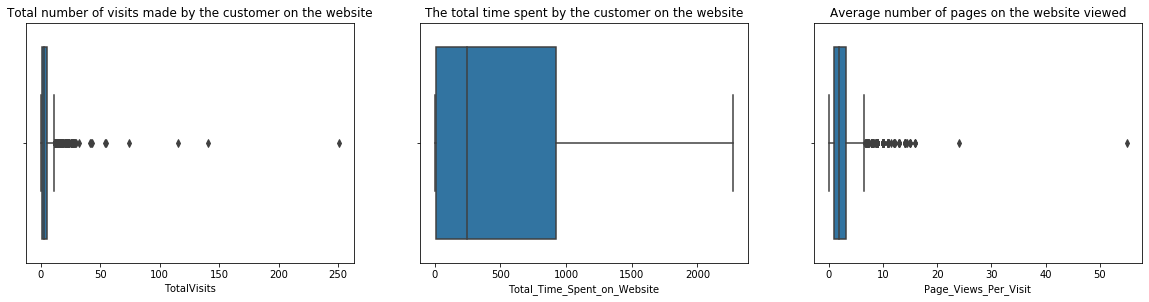

In [63]:
# subplot 1
fig = plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.boxplot(x=num_Leads_data['TotalVisits'].dropna())
plt.title('Total number of visits made by the customer on the website')

# subplot 2
plt.subplot(3,3,2)
sns.boxplot(x=num_Leads_data['Total_Time_Spent_on_Website'].dropna())
plt.title('The total time spent by the customer on the website')


# subplot 3
#fig = plt.figure(figsize=(10,4))
plt.subplot(3,3,3)
sns.boxplot(x=num_Leads_data['Page_Views_Per_Visit'].dropna())
plt.title('Average number of pages on the website viewed')

plt.show()

###### Observation:
- Based on the above plots and Percentiles we can observe that there are a few out liers for TotalVisits and Page_Views_Per_Visit We can cap these values for 95 percentile .  

In [64]:
Q1 = Leads_data.TotalVisits.quantile(0.95)
Q2 = Leads_data.Page_Views_Per_Visit.quantile(0.95)
Leads_data['TotalVisits'][Leads_data['TotalVisits']>=Q1]=Q1
Leads_data['Page_Views_Per_Visit'][Leads_data['Page_Views_Per_Visit']>=Q2]=Q2

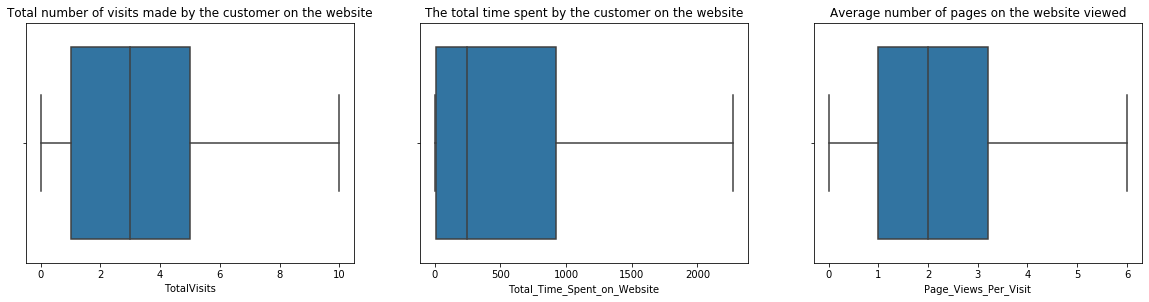

In [65]:
# subplot 1
fig = plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.boxplot(x=Leads_data['TotalVisits'].dropna())
plt.title('Total number of visits made by the customer on the website')

# subplot 2
plt.subplot(3,3,2)
sns.boxplot(x=Leads_data['Total_Time_Spent_on_Website'].dropna())
plt.title('The total time spent by the customer on the website')


# subplot 3
#fig = plt.figure(figsize=(10,4))
plt.subplot(3,3,3)
sns.boxplot(x=Leads_data['Page_Views_Per_Visit'].dropna())
plt.title('Average number of pages on the website viewed')

plt.show()

We can Observe that all the outliers from the numerical values are removed now .Lets go for the next steps now

## Step 4: Test-Train Split

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
# Putting feature variable to X
X = Leads_data.drop(['Converted'], axis=1)

X.head()

,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,A_free_copy_of_Mastering_The_Interview,Lead_Origin_Landing_Page_Submission,Lead_Origin_Lead_Add_Form,Lead_Origin_Lead_Import,Lead_Source_Facebook,Lead_Source_Google,Lead_Source_Olark_Chat,...,Last_Notable_Activity_Form_Submitted_on_Website,Last_Notable_Activity_Had_a_Phone_Conversation,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark_Chat_Conversation,Last_Notable_Activity_Page_Visited_on_Website,Last_Notable_Activity_Resubscribed_to_emails,Last_Notable_Activity_SMS_Sent,Last_Notable_Activity_Unreachable,Last_Notable_Activity_Unsubscribed,Last_Notable_Activity_View_in_browser_link_Clicked
0,0.0,0,0.0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [68]:
# Putting response variable to y
y = Leads_data['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [69]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Step 5: Feature Scaling

In [70]:
from sklearn.preprocessing import MinMaxScaler

In [71]:
scaler = MinMaxScaler()

X_train[['TotalVisits','Total_Time_Spent_on_Website','Page_Views_Per_Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total_Time_Spent_on_Website','Page_Views_Per_Visit']])

X_train.head()

,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,A_free_copy_of_Mastering_The_Interview,Lead_Origin_Landing_Page_Submission,Lead_Origin_Lead_Add_Form,Lead_Origin_Lead_Import,Lead_Source_Facebook,Lead_Source_Google,Lead_Source_Olark_Chat,...,Last_Notable_Activity_Form_Submitted_on_Website,Last_Notable_Activity_Had_a_Phone_Conversation,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark_Chat_Conversation,Last_Notable_Activity_Page_Visited_on_Website,Last_Notable_Activity_Resubscribed_to_emails,Last_Notable_Activity_SMS_Sent,Last_Notable_Activity_Unreachable,Last_Notable_Activity_Unsubscribed,Last_Notable_Activity_View_in_browser_link_Clicked
3009,0.2,0.178347,0.333333,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,0.2,0.085355,0.333333,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0.0,0.000000,0.000000,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4750,0.2,0.619946,0.333333,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0.5,0.711590,0.416667,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [72]:
X_train.describe()

,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,A_free_copy_of_Mastering_The_Interview,Lead_Origin_Landing_Page_Submission,Lead_Origin_Lead_Add_Form,Lead_Origin_Lead_Import,Lead_Source_Facebook,Lead_Source_Google,Lead_Source_Olark_Chat,...,Last_Notable_Activity_Form_Submitted_on_Website,Last_Notable_Activity_Had_a_Phone_Conversation,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark_Chat_Conversation,Last_Notable_Activity_Page_Visited_on_Website,Last_Notable_Activity_Resubscribed_to_emails,Last_Notable_Activity_SMS_Sent,Last_Notable_Activity_Unreachable,Last_Notable_Activity_Unsubscribed,Last_Notable_Activity_View_in_browser_link_Clicked
count,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,...,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000
mean,0.320627,0.217585,0.379863,0.315383,0.535979,0.068651,0.003779,0.003936,0.320737,0.186427,...,0.000157,0.001889,0.359471,0.019052,0.034483,0.000157,0.244371,0.004094,0.004409,0.000157
std,0.278748,0.244868,0.300183,0.464705,0.498743,0.252879,0.061362,0.062622,0.466797,0.389482,...,0.012548,0.043430,0.479883,0.136719,0.182480,0.012548,0.429747,0.063857,0.066257,0.012548
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.100000,0.004492,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.300000,0.110961,0.333333,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.500000,0.413522,0.555000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [73]:
### Checking the Converted Rate
Converted = (sum(Leads_data['Converted'])/len(Leads_data['Converted'].index))*100
Converted

37.85541106458012

## Step 6: Looking at Correlations

In [74]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

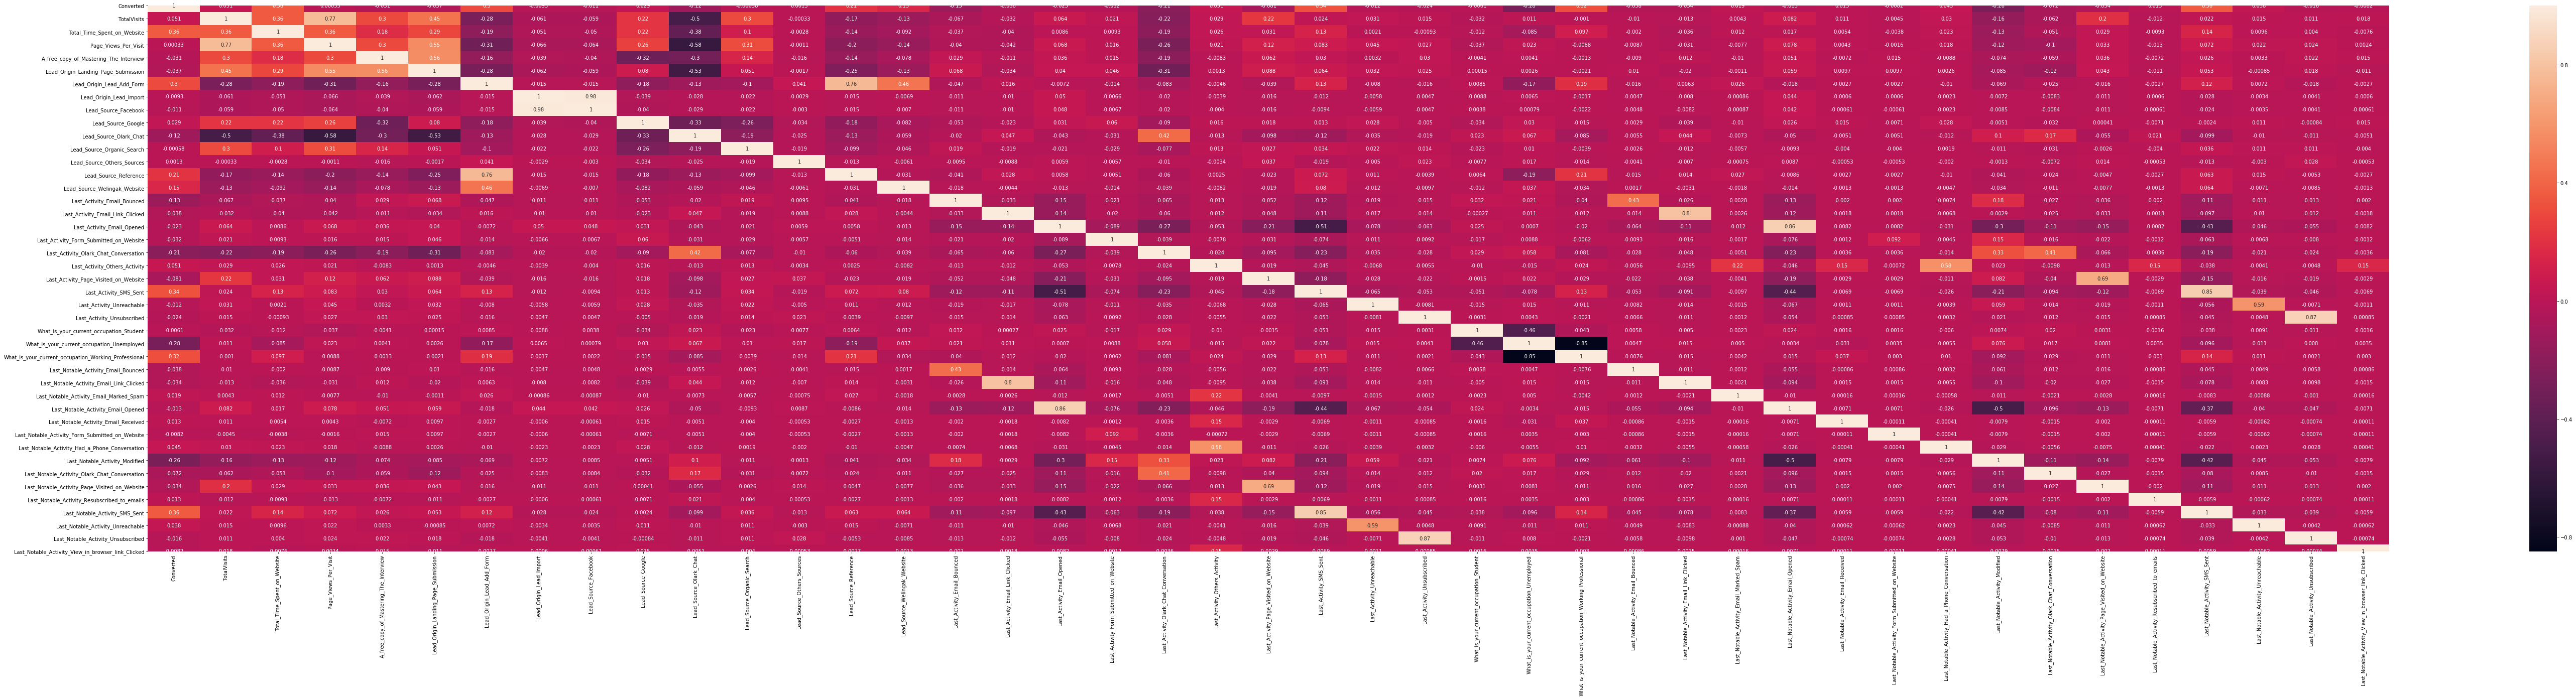

In [75]:
# Let's see the correlation matrix 
plt.figure(figsize = (100,20))        # Size of the figure
sns.heatmap(Leads_data.corr(),annot = True)
plt.show()

Most of the Binary variables are already been dropped during data preparation step, Lets go a head with the next steps

In [76]:
Leads_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 43 columns):
Converted                                               9074 non-null int64
TotalVisits                                             9074 non-null float64
Total_Time_Spent_on_Website                             9074 non-null int64
Page_Views_Per_Visit                                    9074 non-null float64
A_free_copy_of_Mastering_The_Interview                  9074 non-null int64
Lead_Origin_Landing_Page_Submission                     9074 non-null uint8
Lead_Origin_Lead_Add_Form                               9074 non-null uint8
Lead_Origin_Lead_Import                                 9074 non-null uint8
Lead_Source_Facebook                                    9074 non-null uint8
Lead_Source_Google                                      9074 non-null uint8
Lead_Source_Olark_Chat                                  9074 non-null uint8
Lead_Source_Organic_Search                           

## Step 7: Model Building

#### Running Your First Training Model

In [77]:
import statsmodels.api as sm

In [78]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6308
Model Family:                Binomial   Df Model:                           42
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2612.1
Date:                Mon, 20 Jul 2020   Deviance:                       5224.1
Time:                        05:41:17   Pearson chi2:                 6.50e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   19.2506   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
TotalVisits                                              1.2360      0.201      6.160      0.000       0.843       1.629
Total_Time_Spent_on_Website                              4.6151      0.167     27.695      0.000       4.289       4.942
Page_Views_Per_Visit                                    -1.0017      0.209     -4.800      0.000      -1.411      -0.593
A_free_copy_of_Mastering_The_Interview                  -0.0014      0.107     -0.013      0.989      -0.211       0.208
Lead_Origin_Landing_Page_Submission                     -0.1804      0.107     -1.680      0.093      -0.391       0.030
Lead_Origin_Lead_Add_Form                                3.8589      0.392      9.849      0.000       3.091       4.627
Lead_Origin_Lead_Import                                 24.1500   4.82e+04      0.001      1.000   -9.44e+04    9.45e+04
Lead_Source_Facebook                                   -22.5577   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Lead_Source_Google                                       0.3597      0.113      3.176      0.001       0.138       0.582
Lead_Source_Olark_Chat                                   1.2919      0.165      7.828      0.000       0.968       1.615
Lead_Source_Organic_Search                               0.0679      0.131      0.519      0.604      -0.189       0.325
Lead_Source_Others_Sources                               0.1563      0.696      0.224      0.822      -1.208       1.521
Lead_Source_Reference                                    0.0312      0.335      0.093      0.926      -0.625       0.688
Lead_Source_Welingak_Website                             2.0247      0.821      2.467      0.014       0.416       3.633
Last_Activity_Email_Bounced                             -1.6636      0.633     -2.627      0.009      -2.905      -0.422
Last_Activity_Email_Link_Clicked                         0.7341      0.425      1.729      0.084      -0.098       1.566
Last_Activity_Email_Opened                               0.9611      0.253      3.806      0.000       0.466       1.456
Last_Activity_Form_Submitted_on_Website                  0.5351      0.397      1.347      0.178      -0.243       1.314
Last_Activity_Olark_Chat_Conversation                   -0.4047      0.283     -1.432      0.152      -0.959       0.149
Last_Activity_Others_Activity                            2.1838      0.619      3.526      0.000       0.970       3.398
Last_Activity_Page_Visited_on_Website                    0.4196      0.298      1.406      0.160      -0.165       1.005
Last_Activity_SMS_Sent                                   1

## Step 8: Feature Selection Using RFE

In [79]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [80]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [81]:
rfe.support_

array([ True,  True, False, False, False,  True,  True, False, False,
        True, False, False, False,  True,  True, False, False, False,
        True,  True, False, False, False, False,  True,  True,  True,
       False, False, False, False, False, False,  True, False, False,
       False, False,  True,  True, False, False])

In [82]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total_Time_Spent_on_Website', True, 1),
 ('Page_Views_Per_Visit', False, 2),
 ('A_free_copy_of_Mastering_The_Interview', False, 27),
 ('Lead_Origin_Landing_Page_Submission', False, 17),
 ('Lead_Origin_Lead_Add_Form', True, 1),
 ('Lead_Origin_Lead_Import', True, 1),
 ('Lead_Source_Facebook', False, 11),
 ('Lead_Source_Google', False, 12),
 ('Lead_Source_Olark_Chat', True, 1),
 ('Lead_Source_Organic_Search', False, 25),
 ('Lead_Source_Others_Sources', False, 22),
 ('Lead_Source_Reference', False, 20),
 ('Lead_Source_Welingak_Website', True, 1),
 ('Last_Activity_Email_Bounced', True, 1),
 ('Last_Activity_Email_Link_Clicked', False, 13),
 ('Last_Activity_Email_Opened', False, 4),
 ('Last_Activity_Form_Submitted_on_Website', False, 16),
 ('Last_Activity_Olark_Chat_Conversation', True, 1),
 ('Last_Activity_Others_Activity', True, 1),
 ('Last_Activity_Page_Visited_on_Website', False, 18),
 ('Last_Activity_SMS_Sent', False, 3),
 ('Last_Activity_Unreachable', False

In [83]:
col = X_train.columns[rfe.support_]
col

Index(['TotalVisits', 'Total_Time_Spent_on_Website',
       'Lead_Origin_Lead_Add_Form', 'Lead_Origin_Lead_Import',
       'Lead_Source_Olark_Chat', 'Lead_Source_Welingak_Website',
       'Last_Activity_Email_Bounced', 'Last_Activity_Olark_Chat_Conversation',
       'Last_Activity_Others_Activity',
       'What_is_your_current_occupation_Student',
       'What_is_your_current_occupation_Unemployed',
       'What_is_your_current_occupation_Working_Professional',
       'Last_Notable_Activity_Had_a_Phone_Conversation',
       'Last_Notable_Activity_SMS_Sent', 'Last_Notable_Activity_Unreachable'],
      dtype='object')

In [84]:
X_train.columns[~rfe.support_]

Index(['Page_Views_Per_Visit', 'A_free_copy_of_Mastering_The_Interview',
       'Lead_Origin_Landing_Page_Submission', 'Lead_Source_Facebook',
       'Lead_Source_Google', 'Lead_Source_Organic_Search',
       'Lead_Source_Others_Sources', 'Lead_Source_Reference',
       'Last_Activity_Email_Link_Clicked', 'Last_Activity_Email_Opened',
       'Last_Activity_Form_Submitted_on_Website',
       'Last_Activity_Page_Visited_on_Website', 'Last_Activity_SMS_Sent',
       'Last_Activity_Unreachable', 'Last_Activity_Unsubscribed',
       'Last_Notable_Activity_Email_Bounced',
       'Last_Notable_Activity_Email_Link_Clicked',
       'Last_Notable_Activity_Email_Marked_Spam',
       'Last_Notable_Activity_Email_Opened',
       'Last_Notable_Activity_Email_Received',
       'Last_Notable_Activity_Form_Submitted_on_Website',
       'Last_Notable_Activity_Modified',
       'Last_Notable_Activity_Olark_Chat_Conversation',
       'Last_Notable_Activity_Page_Visited_on_Website',
       'Last_Notable_Ac

### Assessing the model with StatsModels

In [85]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2679.7
Date:                Mon, 20 Jul 2020   Deviance:                       5359.5
Time:                        05:41:19   Pearson chi2:                 6.42e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2463      0.561     -2.220      0.026      -2.346      -0.146
TotalVisits                                              0.7278      0.153      4.768      0.000       0.429       1.027
Total_Time_Spent_on_Website                              4.6065      0.163     28.201      0.000       4.286       4.927
Lead_Origin_Lead_Add_Form                                4.2453      0.231     18.400      0.000       3.793       4.697
Lead_Origin_Lead_Import                                  2.0075      0.460      4.364      0.000       1.106       2.909
Lead_Source_Olark_Chat                                   1.6124      0.121     13.342      0.000       1.376       1.849
Lead_Source_Welingak_Website                             2.0530      0.756      2.717      0.007       0.572       3.534
Last_Activity_Email_Bounced                             -2.0903      0.370     -5.644      0.000      -2.816      -1.364
Last_Activity_Olark_Chat_Conversation                   -1.4223      0.161     -8.832      0.000      -1.738      -1.107
Last_Activity_Others_Activity                            1.2470      0.531      2.349      0.019       0.206       2.288
What_is_your_current_occupation_Student                 -1.1287      0.595     -1.898      0.058      -2.294       0.037
What_is_your_current_occupation_Unemployed              -1.5853      0.554     -2.861      0.004      -2.671      -0.499
What_is_your_current_occupation_Working_Professional     1.1613      0.582      1.996      0.046       0.021       2.302
Last_Notable_Activity_Had_a_Phone_Conversation           2.4149      1.213      1.991      0.047       0.037       4.793
Last_Notable_Activity_SMS_Sent                           1.5697      0.079     19.949      0.000       1.415       1.724
Last_Notable_Activity_Unreachable                        1.8111      0.465      3.896      0.000       0.900       2.722
========================================================================================================================
"""

Observation:- Based on the table above we can understand that What_is_your_current_occupation_Student has the most P values lets drop one by one and re generate the model

In [86]:
col1 = col.drop('What_is_your_current_occupation_Student',1)

In [87]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2681.6
Date:                Mon, 20 Jul 2020   Deviance:                       5363.3
Time:                        05:41:19   Pearson chi2:                 6.42e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.2152      0.218    -10.149      0.000      -2.643      -1.787
TotalVisits                                              0.7374      0.152      4.836      0.000       0.439       1.036
Total_Time_Spent_on_Website                              4.6114      0.163     28.239      0.000       4.291       4.931
Lead_Origin_Lead_Add_Form                                4.2555      0.231     18.457      0.000       3.804       4.707
Lead_Origin_Lead_Import                                  2.0115      0.460      4.372      0.000       1.110       2.913
Lead_Source_Olark_Chat                                   1.6129      0.121     13.350      0.000       1.376       1.850
Lead_Source_Welingak_Website                             2.0478      0.756      2.710      0.007       0.567       3.529
Last_Activity_Email_Bounced                             -2.0989      0.370     -5.667      0.000      -2.825      -1.373
Last_Activity_Olark_Chat_Conversation                   -1.4227      0.161     -8.840      0.000      -1.738      -1.107
Last_Activity_Others_Activity                            1.2463      0.531      2.347      0.019       0.205       2.287
What_is_your_current_occupation_Unemployed              -0.6207      0.203     -3.062      0.002      -1.018      -0.223
What_is_your_current_occupation_Working_Professional     2.1259      0.270      7.880      0.000       1.597       2.655
Last_Notable_Activity_Had_a_Phone_Conversation           2.4143      1.213      1.990      0.047       0.036       4.792
Last_Notable_Activity_SMS_Sent                           1.5674      0.079     19.911      0.000       1.413       1.722
Last_Notable_Activity_Unreachable                        1.8162      0.464      3.916      0.000       0.907       2.725
========================================================================================================================
"""

In [88]:
col2 = col1.drop('Last_Notable_Activity_Had_a_Phone_Conversation',1)

In [89]:
X_train_sm = sm.add_constant(X_train[col2])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2684.2
Date:                Mon, 20 Jul 2020   Deviance:                       5368.5
Time:                        05:41:19   Pearson chi2:                 6.42e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.2122      0.218    -10.139      0.000      -2.640      -1.785
TotalVisits                                              0.7380      0.152      4.845      0.000       0.439       1.036
Total_Time_Spent_on_Website                              4.6053      0.163     28.224      0.000       4.285       4.925
Lead_Origin_Lead_Add_Form                                4.2514      0.231     18.441      0.000       3.800       4.703
Lead_Origin_Lead_Import                                  2.0087      0.460      4.367      0.000       1.107       2.910
Lead_Source_Olark_Chat                                   1.6057      0.121     13.302      0.000       1.369       1.842
Lead_Source_Welingak_Website                             2.0488      0.756      2.711      0.007       0.568       3.530
Last_Activity_Email_Bounced                             -2.0982      0.370     -5.667      0.000      -2.824      -1.373
Last_Activity_Olark_Chat_Conversation                   -1.4199      0.161     -8.824      0.000      -1.735      -1.105
Last_Activity_Others_Activity                            1.9312      0.450      4.290      0.000       1.049       2.814
What_is_your_current_occupation_Unemployed              -0.6206      0.203     -3.063      0.002      -1.018      -0.223
What_is_your_current_occupation_Working_Professional     2.1223      0.270      7.868      0.000       1.594       2.651
Last_Notable_Activity_SMS_Sent                           1.5670      0.079     19.912      0.000       1.413       1.721
Last_Notable_Activity_Unreachable                        1.8149      0.464      3.914      0.000       0.906       2.724
========================================================================================================================
"""

In [90]:
# Deleting columns with negative coefficient values

In [91]:
col2 = col2.drop(['Last_Activity_Email_Bounced','Last_Activity_Olark_Chat_Conversation', 'What_is_your_current_occupation_Unemployed'], 1)

In [92]:
X_train_sm = sm.add_constant(X_train[col2])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6340
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2759.2
Date:                Mon, 20 Jul 2020   Deviance:                       5518.4
Time:                        05:41:19   Pearson chi2:                 6.48e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.0153      0.099    -30.584      0.000      -3.209      -2.822
TotalVisits                                              0.8523      0.151      5.648      0.000       0.557       1.148
Total_Time_Spent_on_Website                              4.6310      0.163     28.489      0.000       4.312       4.950
Lead_Origin_Lead_Add_Form                                4.4270      0.231     19.197      0.000       3.975       4.879
Lead_Origin_Lead_Import                                  2.1772      0.462      4.717      0.000       1.273       3.082
Lead_Source_Olark_Chat                                   1.3570      0.115     11.760      0.000       1.131       1.583
Lead_Source_Welingak_Website                             1.8851      0.749      2.518      0.012       0.418       3.352
Last_Activity_Others_Activity                            2.1050      0.450      4.680      0.000       1.224       2.987
What_is_your_current_occupation_Working_Professional     2.7717      0.183     15.108      0.000       2.412       3.131
Last_Notable_Activity_SMS_Sent                           1.7509      0.077     22.593      0.000       1.599       1.903
Last_Notable_Activity_Unreachable                        1.9734      0.462      4.268      0.000       1.067       2.880
========================================================================================================================
"""

In [93]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.117230
1012    0.579844
9226    0.159985
4750    0.855326
7987    0.669563
1281    0.754662
2880    0.060014
4971    0.924043
7536    0.821403
1248    0.566973
dtype: float64

In [94]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.11723028, 0.57984436, 0.15998452, 0.85532599, 0.669563  ,
       0.75466197, 0.06001414, 0.92404292, 0.82140342, 0.56697268])

###### Creating a dataframe with the actual Converted Variable and the predicted probabilities

In [95]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Pros_ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Pros_ID
0,0,0.117230,3009
1,0,0.579844,1012
2,0,0.159985,9226
3,1,0.855326,4750
4,1,0.669563,7987


###### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [96]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Pros_ID,predicted
0,0,0.117230,3009,0
1,0,0.579844,1012,1
2,0,0.159985,9226,0
3,1,0.855326,4750,1
4,1,0.669563,7987,1


In [97]:
from sklearn import metrics

In [98]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3450  455]
 [ 774 1672]]


In [99]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8064871673752165


###### Checking VIFs

In [100]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [101]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col2].columns
vif['VIF'] = [variance_inflation_factor(X_train[col2].values, i) for i in range(X_train[col2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Total_Time_Spent_on_Website,1.97
0,TotalVisits,1.88
2,Lead_Origin_Lead_Add_Form,1.48
8,Last_Notable_Activity_SMS_Sent,1.37
5,Lead_Source_Welingak_Website,1.33
7,What_is_your_current_occupation_Working_Profes...,1.18
4,Lead_Source_Olark_Chat,1.02
6,Last_Activity_Others_Activity,1.01
9,Last_Notable_Activity_Unreachable,1.01
3,Lead_Origin_Lead_Import,1.00


In [102]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col2])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6340
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2759.2
Date:                Mon, 20 Jul 2020   Deviance:                       5518.4
Time:                        05:41:20   Pearson chi2:                 6.48e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.0153      0.099    -30.584      0.000      -3.209      -2.822
TotalVisits                                              0.8523      0.151      5.648      0.000       0.557       1.148
Total_Time_Spent_on_Website                              4.6310      0.163     28.489      0.000       4.312       4.950
Lead_Origin_Lead_Add_Form                                4.4270      0.231     19.197      0.000       3.975       4.879
Lead_Origin_Lead_Import                                  2.1772      0.462      4.717      0.000       1.273       3.082
Lead_Source_Olark_Chat                                   1.3570      0.115     11.760      0.000       1.131       1.583
Lead_Source_Welingak_Website                             1.8851      0.749      2.518      0.012       0.418       3.352
Last_Activity_Others_Activity                            2.1050      0.450      4.680      0.000       1.224       2.987
What_is_your_current_occupation_Working_Professional     2.7717      0.183     15.108      0.000       2.412       3.131
Last_Notable_Activity_SMS_Sent                           1.7509      0.077     22.593      0.000       1.599       1.903
Last_Notable_Activity_Unreachable                        1.9734      0.462      4.268      0.000       1.067       2.880
========================================================================================================================
"""

In [103]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [104]:
y_train_pred[:10]

array([0.11723028, 0.57984436, 0.15998452, 0.85532599, 0.669563  ,
       0.75466197, 0.06001414, 0.92404292, 0.82140342, 0.56697268])

In [105]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [106]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Pros_ID,predicted
0,0,0.117230,3009,0
1,0,0.579844,1012,1
2,0,0.159985,9226,0
3,1,0.855326,4750,1
4,1,0.669563,7987,1


In [107]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8064871673752165


In [108]:
# Let's take a look at the confusion matrix again 
confusion1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion1

array([[3450,  455],
       [ 774, 1672]], dtype=int64)

In [109]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col2].columns
vif['VIF'] = [variance_inflation_factor(X_train[col2].values, i) for i in range(X_train[col2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Total_Time_Spent_on_Website,1.97
0,TotalVisits,1.88
2,Lead_Origin_Lead_Add_Form,1.48
8,Last_Notable_Activity_SMS_Sent,1.37
5,Lead_Source_Welingak_Website,1.33
7,What_is_your_current_occupation_Working_Profes...,1.18
4,Lead_Source_Olark_Chat,1.02
6,Last_Activity_Others_Activity,1.01
9,Last_Notable_Activity_Unreachable,1.01
3,Lead_Origin_Lead_Import,1.00


In [110]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col2])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6340
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2759.2
Date:                Mon, 20 Jul 2020   Deviance:                       5518.4
Time:                        05:41:20   Pearson chi2:                 6.48e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.0153      0.099    -30.584      0.000      -3.209      -2.822
TotalVisits                                              0.8523      0.151      5.648      0.000       0.557       1.148
Total_Time_Spent_on_Website                              4.6310      0.163     28.489      0.000       4.312       4.950
Lead_Origin_Lead_Add_Form                                4.4270      0.231     19.197      0.000       3.975       4.879
Lead_Origin_Lead_Import                                  2.1772      0.462      4.717      0.000       1.273       3.082
Lead_Source_Olark_Chat                                   1.3570      0.115     11.760      0.000       1.131       1.583
Lead_Source_Welingak_Website                             1.8851      0.749      2.518      0.012       0.418       3.352
Last_Activity_Others_Activity                            2.1050      0.450      4.680      0.000       1.224       2.987
What_is_your_current_occupation_Working_Professional     2.7717      0.183     15.108      0.000       2.412       3.131
Last_Notable_Activity_SMS_Sent                           1.7509      0.077     22.593      0.000       1.599       1.903
Last_Notable_Activity_Unreachable                        1.9734      0.462      4.268      0.000       1.067       2.880
========================================================================================================================
"""

In [111]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [112]:
y_train_pred[:10]

array([0.11723028, 0.57984436, 0.15998452, 0.85532599, 0.669563  ,
       0.75466197, 0.06001414, 0.92404292, 0.82140342, 0.56697268])

In [113]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [114]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Pros_ID,predicted
0,0,0.117230,3009,0
1,0,0.579844,1012,1
2,0,0.159985,9226,0
3,1,0.855326,4750,1
4,1,0.669563,7987,1


In [115]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8064871673752165


In [116]:
# Let's take a look at the confusion matrix again 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion2

array([[3450,  455],
       [ 774, 1672]], dtype=int64)

In [117]:
vif = pd.DataFrame()
vif['Features'] = X_train[col2].columns
vif['VIF'] = [variance_inflation_factor(X_train[col2].values, i) for i in range(X_train[col2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Total_Time_Spent_on_Website,1.97
0,TotalVisits,1.88
2,Lead_Origin_Lead_Add_Form,1.48
8,Last_Notable_Activity_SMS_Sent,1.37
5,Lead_Source_Welingak_Website,1.33
7,What_is_your_current_occupation_Working_Profes...,1.18
4,Lead_Source_Olark_Chat,1.02
6,Last_Activity_Others_Activity,1.01
9,Last_Notable_Activity_Unreachable,1.01
3,Lead_Origin_Lead_Import,1.00


In [118]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col2])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6340
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2759.2
Date:                Mon, 20 Jul 2020   Deviance:                       5518.4
Time:                        05:41:20   Pearson chi2:                 6.48e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.0153      0.099    -30.584      0.000      -3.209      -2.822
TotalVisits                                              0.8523      0.151      5.648      0.000       0.557       1.148
Total_Time_Spent_on_Website                              4.6310      0.163     28.489      0.000       4.312       4.950
Lead_Origin_Lead_Add_Form                                4.4270      0.231     19.197      0.000       3.975       4.879
Lead_Origin_Lead_Import                                  2.1772      0.462      4.717      0.000       1.273       3.082
Lead_Source_Olark_Chat                                   1.3570      0.115     11.760      0.000       1.131       1.583
Lead_Source_Welingak_Website                             1.8851      0.749      2.518      0.012       0.418       3.352
Last_Activity_Others_Activity                            2.1050      0.450      4.680      0.000       1.224       2.987
What_is_your_current_occupation_Working_Professional     2.7717      0.183     15.108      0.000       2.412       3.131
Last_Notable_Activity_SMS_Sent                           1.7509      0.077     22.593      0.000       1.599       1.903
Last_Notable_Activity_Unreachable                        1.9734      0.462      4.268      0.000       1.067       2.880
========================================================================================================================
"""

In [119]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col2])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6340
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2759.2
Date:                Mon, 20 Jul 2020   Deviance:                       5518.4
Time:                        05:41:21   Pearson chi2:                 6.48e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.0153      0.099    -30.584      0.000      -3.209      -2.822
TotalVisits                                              0.8523      0.151      5.648      0.000       0.557       1.148
Total_Time_Spent_on_Website                              4.6310      0.163     28.489      0.000       4.312       4.950
Lead_Origin_Lead_Add_Form                                4.4270      0.231     19.197      0.000       3.975       4.879
Lead_Origin_Lead_Import                                  2.1772      0.462      4.717      0.000       1.273       3.082
Lead_Source_Olark_Chat                                   1.3570      0.115     11.760      0.000       1.131       1.583
Lead_Source_Welingak_Website                             1.8851      0.749      2.518      0.012       0.418       3.352
Last_Activity_Others_Activity                            2.1050      0.450      4.680      0.000       1.224       2.987
What_is_your_current_occupation_Working_Professional     2.7717      0.183     15.108      0.000       2.412       3.131
Last_Notable_Activity_SMS_Sent                           1.7509      0.077     22.593      0.000       1.599       1.903
Last_Notable_Activity_Unreachable                        1.9734      0.462      4.268      0.000       1.067       2.880
========================================================================================================================
"""

In [120]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [121]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [122]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.8 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.8 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Pros_ID,predicted
0,0,0.117230,3009,0
1,0,0.579844,1012,0
2,0,0.159985,9226,0
3,1,0.855326,4750,1
4,1,0.669563,7987,0


In [123]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7606676113997796


In [124]:
# Let's take a look at the confusion matrix again 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion2

array([[3791,  114],
       [1406, 1040]], dtype=int64)

In [125]:
vif = pd.DataFrame()
vif['Features'] = X_train[col2].columns
vif['VIF'] = [variance_inflation_factor(X_train[col2].values, i) for i in range(X_train[col2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Total_Time_Spent_on_Website,1.97
0,TotalVisits,1.88
2,Lead_Origin_Lead_Add_Form,1.48
8,Last_Notable_Activity_SMS_Sent,1.37
5,Lead_Source_Welingak_Website,1.33
7,What_is_your_current_occupation_Working_Profes...,1.18
4,Lead_Source_Olark_Chat,1.02
6,Last_Activity_Others_Activity,1.01
9,Last_Notable_Activity_Unreachable,1.01
3,Lead_Origin_Lead_Import,1.00


#### Metrics beyond simply accuracy

In [126]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [127]:
 ## Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.42518397383483236

In [128]:
# Let us calculate specificity
TN / float(TN+FP)

0.9708066581306017

In [129]:
# Calculate false postive rate - predicting Converted when customer does not have Convert
print(FP/ float(TN+FP))

0.029193341869398207


In [130]:
# positive predictive value 
print (TP / float(TP+FP))

0.901213171577123


In [131]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7294593034442948


## Step 9: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [132]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [133]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

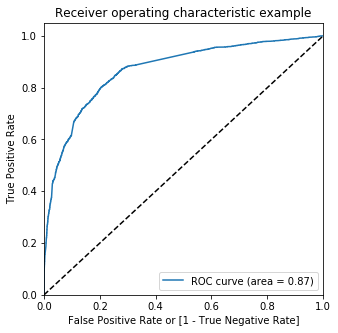

In [134]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

## Step 10: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [135]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Pros_ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.117230,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.579844,1012,0,1,1,1,1,1,1,0,0,0,0
2,0,0.159985,9226,0,1,1,0,0,0,0,0,0,0,0
3,1,0.855326,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.669563,7987,0,1,1,1,1,1,1,1,0,0,0


In [136]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.543379  0.967294  0.277849
0.2   0.2  0.773894  0.879395  0.707810
0.3   0.3  0.787593  0.831971  0.759795
0.4   0.4  0.800189  0.757155  0.827145
0.5   0.5  0.806487  0.683565  0.883483
0.6   0.6  0.790742  0.571137  0.928297
0.7   0.7  0.777830  0.501635  0.950832
0.8   0.8  0.760668  0.425184  0.970807
0.9   0.9  0.712171  0.271055  0.988476


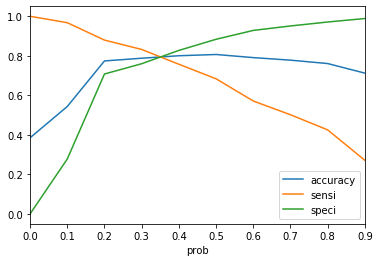

In [137]:
# Let's plot accuracy, sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

##### From the curve above, 0.38 is the optimum point to take it as a cutoff probability. However, we want more accurate leads, so using the cutoff probability as 0.8

In [138]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.8 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Pros_ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.117230,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.579844,1012,0,1,1,1,1,1,1,0,0,0,0,0
2,0,0.159985,9226,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.855326,4750,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.669563,7987,0,1,1,1,1,1,1,1,0,0,0,0


In [139]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7606676113997796

In [140]:
confusion3 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion3

array([[3791,  114],
       [1406, 1040]], dtype=int64)

In [141]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [142]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.42518397383483236

In [143]:
# Let us calculate specificity
TN / float(TN+FP)

0.9708066581306017

In [144]:
# Calculate false postive rate - predicting Converted when customer does not have converted
print(FP/ float(TN+FP))

0.029193341869398207


In [145]:
# Positive predictive value 
print (TP / float(TP+FP))

0.901213171577123


In [146]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7294593034442948


## Precision and Recall

In [147]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3791,  114],
       [1406, 1040]], dtype=int64)

##### Precision
TP / TP + FP

In [148]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.901213171577123

##### Recall
TP / TP + FN

In [149]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.42518397383483236

Using sklearn utilities for the same

In [150]:
from sklearn.metrics import precision_score, recall_score

In [151]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.901213171577123

In [152]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.42518397383483236

### Precision and recall tradeoff

In [153]:
from sklearn.metrics import precision_recall_curve

In [154]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64, 0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6346    0
 6347    0
 6348    1
 6349    0
 6350    0
 Name: predicted, Length: 6351, dtype: int64)

In [155]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

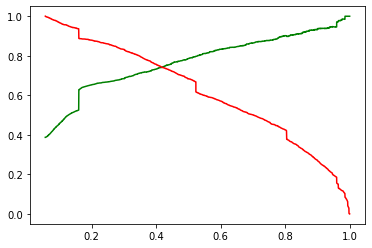

In [156]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [157]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.8 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Pros_ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.117230,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.579844,1012,0,1,1,1,1,1,1,0,0,0,0,0
2,0,0.159985,9226,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.855326,4750,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.669563,7987,0,1,1,1,1,1,1,1,0,0,0,0


In [158]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7606676113997796

In [159]:
# Creating confusion matrix again
confusion4 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion4

array([[3791,  114],
       [1406, 1040]], dtype=int64)

In [160]:
# Substituting the value of true positive
TP = confusion4[1,1]
# Substituting the value of true negatives
TN = confusion4[0,0]
# Substituting the value of false positives
FP = confusion4[0,1] 
# Substituting the value of false negatives
FN = confusion4[1,0]

In [161]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.901213171577123

In [162]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.42518397383483236

## Step 11: Making predictions on the test set

In [163]:
X_test[['TotalVisits','Total_Time_Spent_on_Website','Page_Views_Per_Visit']] = scaler.transform(X_test[['TotalVisits','Total_Time_Spent_on_Website','Page_Views_Per_Visit']])

In [164]:
X_test = X_test[col2]
X_test.head()

,TotalVisits,Total_Time_Spent_on_Website,Lead_Origin_Lead_Add_Form,Lead_Origin_Lead_Import,Lead_Source_Olark_Chat,Lead_Source_Welingak_Website,Last_Activity_Others_Activity,What_is_your_current_occupation_Working_Professional,Last_Notable_Activity_SMS_Sent,Last_Notable_Activity_Unreachable
3271,0.4,0.070530,0,0,0,0,0,0,0,0
1490,0.5,0.679695,0,0,0,0,0,1,0,0
7936,0.2,0.033243,0,0,0,0,0,0,0,0
4216,0.0,0.000000,1,0,0,0,0,0,0,0
3830,0.8,0.073675,0,0,0,0,0,0,0,0


In [165]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [166]:
y_test_pred = res.predict(X_test_sm)

In [167]:
y_test_pred[:10]

3271    0.087245
1490    0.965450
7936    0.063513
4216    0.804032
3830    0.120019
1800    0.604896
6507    0.322930
4821    0.193721
4223    0.959402
4714    0.159985
dtype: float64

In [168]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [169]:
# Let's see the head
y_pred_1.head()

,0
3271,0.087245
1490,0.965450
7936,0.063513
4216,0.804032
3830,0.120019


In [170]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [171]:
# Putting CustID to index
y_test_df['Pros_ID'] = y_test_df.index

In [172]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [173]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [174]:
y_pred_final.head()

,Converted,Pros_ID,0
0,0,3271,0.087245
1,1,1490,0.965450
2,0,7936,0.063513
3,1,4216,0.804032
4,0,3830,0.120019


In [175]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [176]:
y_pred_final

,Converted,Pros_ID,Converted_Prob
0,0,3271,0.087245
1,1,1490,0.965450
2,0,7936,0.063513
3,1,4216,0.804032
4,0,3830,0.120019
...,...,...,...
2718,0,850,0.262124
2719,0,2879,0.165275
2720,1,6501,0.899781
2721,0,7155,0.156012


In [177]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.8 else 0)

In [178]:
y_pred_final.head()

,Converted,Pros_ID,Converted_Prob,final_predicted
0,0,3271,0.087245,0
1,1,1490,0.965450,1
2,0,7936,0.063513,0
3,1,4216,0.804032,1
4,0,3830,0.120019,0


In [179]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7623944179214102

In [180]:
confusion5 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion5

array([[1692,   42],
       [ 605,  384]], dtype=int64)

In [181]:
TP = confusion5[1,1] # true positive 
TN = confusion5[0,0] # true negatives
FP = confusion5[0,1] # false positives
FN = confusion5[1,0] # false negatives

In [182]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.38827098078867545

In [183]:
# Let us calculate specificity
TN / float(TN+FP)

0.9757785467128027

In [184]:
# Calculate false postive rate - predicting Converted when customer does not have Converted
print(FP/ float(TN+FP))

0.02422145328719723


In [185]:
# positive predictive value 
print (TP / float(TP+FP))

0.9014084507042254


In [186]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7366129734436221


In [187]:
#Precision
confusion5[1,1]/(confusion5[0,1]+confusion5[1,1])

0.9014084507042254

In [188]:
#Recall
confusion5[1,1]/(confusion5[1,0]+confusion5[1,1])

0.38827098078867545

In [189]:
from sklearn.metrics import precision_recall_curve

In [190]:
y_pred_final.Converted, y_pred_final.final_predicted

(0       0
 1       1
 2       0
 3       1
 4       0
        ..
 2718    0
 2719    0
 2720    1
 2721    0
 2722    0
 Name: Converted, Length: 2723, dtype: int64, 0       0
 1       1
 2       0
 3       1
 4       0
        ..
 2718    0
 2719    0
 2720    1
 2721    0
 2722    0
 Name: final_predicted, Length: 2723, dtype: int64)

In [191]:
p, r, thresholds = precision_recall_curve(y_pred_final.Converted, y_pred_final.Converted_Prob)

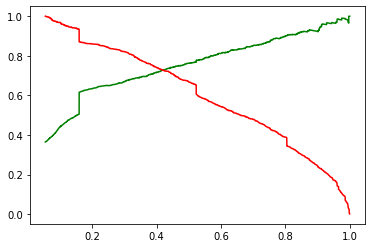

In [192]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Plotting the ROC Curve

In [193]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr,tpr, thresholds

In [194]:
fpr, tpr, thresholds = metrics.roc_curve( y_pred_final.Converted, y_pred_final.Converted_Prob, drop_intermediate = False )

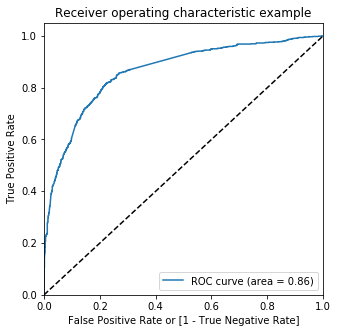

(array([0.       , 0.       , 0.       , ..., 0.9988466, 0.9994233,
        1.       ]),
 array([0.        , 0.00101112, 0.00202224, ..., 1.        , 1.        ,
        1.        ]),
 array([1.99899754, 0.99899754, 0.99836771, ..., 0.05241573, 0.0523125 ,
        0.0521066 ]))

In [195]:
draw_roc(y_pred_final.Converted, y_pred_final.Converted_Prob)

In [196]:
#lead score for customer in the range 0-100
y_test_pred = y_test_pred * 100
y_test_pred[:10]

3271     8.724484
1490    96.545050
7936     6.351295
4216    80.403173
3830    12.001933
1800    60.489633
6507    32.292988
4821    19.372088
4223    95.940162
4714    15.998452
dtype: float64

Conclusion
It was found that the variables that mattered the most in the potential buyers are:

- TotalVisits.
- Total_Time_Spent_on_Website.
- Lead_Origin
    - Lead_Add_Form
    - Lead_Import
- Lead_Source_Olark_Chat
- Lead_Source_Welingak_Website
- When the Last Activity was:
    - Others_Activity
- What_is_your_current_occupation_Working_Professional
- Last_Notable_Activity
    - SMS Sent
    - Unreachable

Keeping these in mind the X Education can flourish as they have a very high chance to get almost all the potential buyers to change their mind and buy their courses.

In [197]:
#lead score for customer in the range 0-100
y_test_pred_df = pd.DataFrame(y_test_pred)

In [198]:
y_test_pred_df.columns = ['Lead Score']

In [199]:
pd.options.display.max_rows = None

In [200]:
round(y_test_pred_df.sort_values(by='Lead Score', ascending=False), 0)

,Lead Score
4613,100.0
2011,100.0
2378,100.0
5797,100.0
2763,100.0
4772,100.0
5805,100.0
2680,100.0
5808,100.0
2598,100.0


In [201]:
Leads_data.head()

,Converted,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,A_free_copy_of_Mastering_The_Interview,Lead_Origin_Landing_Page_Submission,Lead_Origin_Lead_Add_Form,Lead_Origin_Lead_Import,Lead_Source_Facebook,Lead_Source_Google,...,Last_Notable_Activity_Form_Submitted_on_Website,Last_Notable_Activity_Had_a_Phone_Conversation,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark_Chat_Conversation,Last_Notable_Activity_Page_Visited_on_Website,Last_Notable_Activity_Resubscribed_to_emails,Last_Notable_Activity_SMS_Sent,Last_Notable_Activity_Unreachable,Last_Notable_Activity_Unsubscribed,Last_Notable_Activity_View_in_browser_link_Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


### Adding Lead Score Column to the given dataset

In [202]:
Leads_data_With_LeadScore = Leads_data.copy()

In [203]:
# Scaling using MinMaxScaler, the first numeric variable in our model
Xmin = Leads_data_With_LeadScore['Total_Time_Spent_on_Website'].min()
Xmax = Leads_data_With_LeadScore['Total_Time_Spent_on_Website'].max()

In [204]:
Leads_data_With_LeadScore['Total_Time_Spent_on_Website_Scaled'] = (Leads_data_With_LeadScore['Total_Time_Spent_on_Website'] - Xmin) / (Xmax - Xmin)

In [205]:
# Scaling using MinMaxScaler, the second numeric variable in our model
Xmin = Leads_data_With_LeadScore['TotalVisits'].min()
Xmax = Leads_data_With_LeadScore['TotalVisits'].max()

In [206]:
Leads_data_With_LeadScore['TotalVisits_Scaled'] = (Leads_data_With_LeadScore['TotalVisits'] - Xmin) / (Xmax - Xmin)

In [207]:
Leads_data_With_LeadScore.head()

,Converted,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,A_free_copy_of_Mastering_The_Interview,Lead_Origin_Landing_Page_Submission,Lead_Origin_Lead_Add_Form,Lead_Origin_Lead_Import,Lead_Source_Facebook,Lead_Source_Google,...,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark_Chat_Conversation,Last_Notable_Activity_Page_Visited_on_Website,Last_Notable_Activity_Resubscribed_to_emails,Last_Notable_Activity_SMS_Sent,Last_Notable_Activity_Unreachable,Last_Notable_Activity_Unsubscribed,Last_Notable_Activity_View_in_browser_link_Clicked,Total_Time_Spent_on_Website_Scaled,TotalVisits_Scaled
0,0,0.0,0,0.0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0.000000,0.0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.296655,0.5
2,1,2.0,1532,2.0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0.674296,0.2
3,0,1.0,305,1.0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0.134243,0.1
4,1,2.0,1428,1.0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0.628521,0.2


#### Adding Lead_score column using our model

In [208]:
Leads_data_With_LeadScore['Lead_score'] = np.exp(-3.0153 + (0.8523 * Leads_data_With_LeadScore['TotalVisits']) + (4.6310 * Leads_data_With_LeadScore['Total_Time_Spent_on_Website']) + (4.4270 * Leads_data_With_LeadScore['Lead_Origin_Lead_Add_Form']) + (2.1772 * Leads_data_With_LeadScore['Lead_Origin_Lead_Import']) + (1.3570 * Leads_data_With_LeadScore['Lead_Source_Olark_Chat']) + (2.1050 * Leads_data_With_LeadScore['Last_Activity_Others_Activity']) + (1.7509 * Leads_data_With_LeadScore['Last_Notable_Activity_SMS_Sent']) + (1.8851 * Leads_data_With_LeadScore['Lead_Source_Welingak_Website']) + (2.7717 * Leads_data_With_LeadScore['What_is_your_current_occupation_Working_Professional']) + (1.9734 * Leads_data_With_LeadScore['Last_Notable_Activity_Unreachable']))                  

In [209]:
Leads_data_With_LeadScore.head()

,Converted,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,A_free_copy_of_Mastering_The_Interview,Lead_Origin_Landing_Page_Submission,Lead_Origin_Lead_Add_Form,Lead_Origin_Lead_Import,Lead_Source_Facebook,Lead_Source_Google,...,Last_Notable_Activity_Olark_Chat_Conversation,Last_Notable_Activity_Page_Visited_on_Website,Last_Notable_Activity_Resubscribed_to_emails,Last_Notable_Activity_SMS_Sent,Last_Notable_Activity_Unreachable,Last_Notable_Activity_Unsubscribed,Last_Notable_Activity_View_in_browser_link_Clicked,Total_Time_Spent_on_Website_Scaled,TotalVisits_Scaled,Lead_score
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.000000,0.0,0.190462
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.296655,0.5,inf
2,1,2.0,1532,2.0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0.674296,0.2,inf
3,0,1.0,305,1.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0.134243,0.1,inf
4,1,2.0,1428,1.0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0.628521,0.2,inf


In [210]:
# Calculating the probability of conversion, and using it as Lead Score
Leads_data_With_LeadScore['Lead_score'] = Leads_data_With_LeadScore['Lead_score'].map(lambda x: (x / (1 + x)))

In [211]:
Leads_data_With_LeadScore.head()

,Converted,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,A_free_copy_of_Mastering_The_Interview,Lead_Origin_Landing_Page_Submission,Lead_Origin_Lead_Add_Form,Lead_Origin_Lead_Import,Lead_Source_Facebook,Lead_Source_Google,...,Last_Notable_Activity_Olark_Chat_Conversation,Last_Notable_Activity_Page_Visited_on_Website,Last_Notable_Activity_Resubscribed_to_emails,Last_Notable_Activity_SMS_Sent,Last_Notable_Activity_Unreachable,Last_Notable_Activity_Unsubscribed,Last_Notable_Activity_View_in_browser_link_Clicked,Total_Time_Spent_on_Website_Scaled,TotalVisits_Scaled,Lead_score
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.000000,0.0,0.15999
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.296655,0.5,NaN
2,1,2.0,1532,2.0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0.674296,0.2,NaN
3,0,1.0,305,1.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0.134243,0.1,NaN
4,1,2.0,1428,1.0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0.628521,0.2,NaN


In [212]:
# Rounding the probability with zero decimal points and multiplying it by 100 to get a lead score ranging between 0 and 100
Leads_data_With_LeadScore['Lead_score'] = round(Leads_data_With_LeadScore['Lead_score'] * 100, 0)

In [213]:
Leads_data_With_LeadScore.head()

,Converted,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,A_free_copy_of_Mastering_The_Interview,Lead_Origin_Landing_Page_Submission,Lead_Origin_Lead_Add_Form,Lead_Origin_Lead_Import,Lead_Source_Facebook,Lead_Source_Google,...,Last_Notable_Activity_Olark_Chat_Conversation,Last_Notable_Activity_Page_Visited_on_Website,Last_Notable_Activity_Resubscribed_to_emails,Last_Notable_Activity_SMS_Sent,Last_Notable_Activity_Unreachable,Last_Notable_Activity_Unsubscribed,Last_Notable_Activity_View_in_browser_link_Clicked,Total_Time_Spent_on_Website_Scaled,TotalVisits_Scaled,Lead_score
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.000000,0.0,16.0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.296655,0.5,NaN
2,1,2.0,1532,2.0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0.674296,0.2,NaN
3,0,1.0,305,1.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0.134243,0.1,NaN
4,1,2.0,1428,1.0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0.628521,0.2,NaN


In [214]:
# Sorting the data with Lead Score in descending order
Leads_data_With_LeadScore.sort_values(by='Lead_score', ascending = False, inplace=True)

In [215]:
Leads_data_With_LeadScore.head()

,Converted,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,A_free_copy_of_Mastering_The_Interview,Lead_Origin_Landing_Page_Submission,Lead_Origin_Lead_Add_Form,Lead_Origin_Lead_Import,Lead_Source_Facebook,Lead_Source_Google,...,Last_Notable_Activity_Olark_Chat_Conversation,Last_Notable_Activity_Page_Visited_on_Website,Last_Notable_Activity_Resubscribed_to_emails,Last_Notable_Activity_SMS_Sent,Last_Notable_Activity_Unreachable,Last_Notable_Activity_Unsubscribed,Last_Notable_Activity_View_in_browser_link_Clicked,Total_Time_Spent_on_Website_Scaled,TotalVisits_Scaled,Lead_score
4772,1,0.0,0,0.00,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0.000000,0.0,100.0
4073,0,8.0,149,6.00,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0.065581,0.8,100.0
4142,0,7.0,115,3.50,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0.050616,0.7,100.0
4140,1,5.0,140,5.00,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0.061620,0.5,100.0
7965,0,8.0,50,2.67,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0.022007,0.8,100.0


In [216]:
Leads_data_With_LeadScore.Lead_score.count()

3721

In [217]:
Leads_data_With_LeadScore['Lead_score'][Leads_data_With_LeadScore['Lead_score'] >= 80 ].count()

2110

# So, based on the model we developed, if we were to implement it on the given dataset, it would have generated 2110 leads (out of 3721 defined values as some are infinites) with Lead Score of greater than or equal to 80 (or probability of 80% or more). NOTE: Lead score ranges between 0-100